In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **데이터 로드**

In [47]:
# 구글드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
data = pd.read_csv('/content/drive/MyDrive/Machine learning in Finance/텀프로젝트/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **EDA**

##결측치 확인

In [49]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## pair plot, correlation matrix

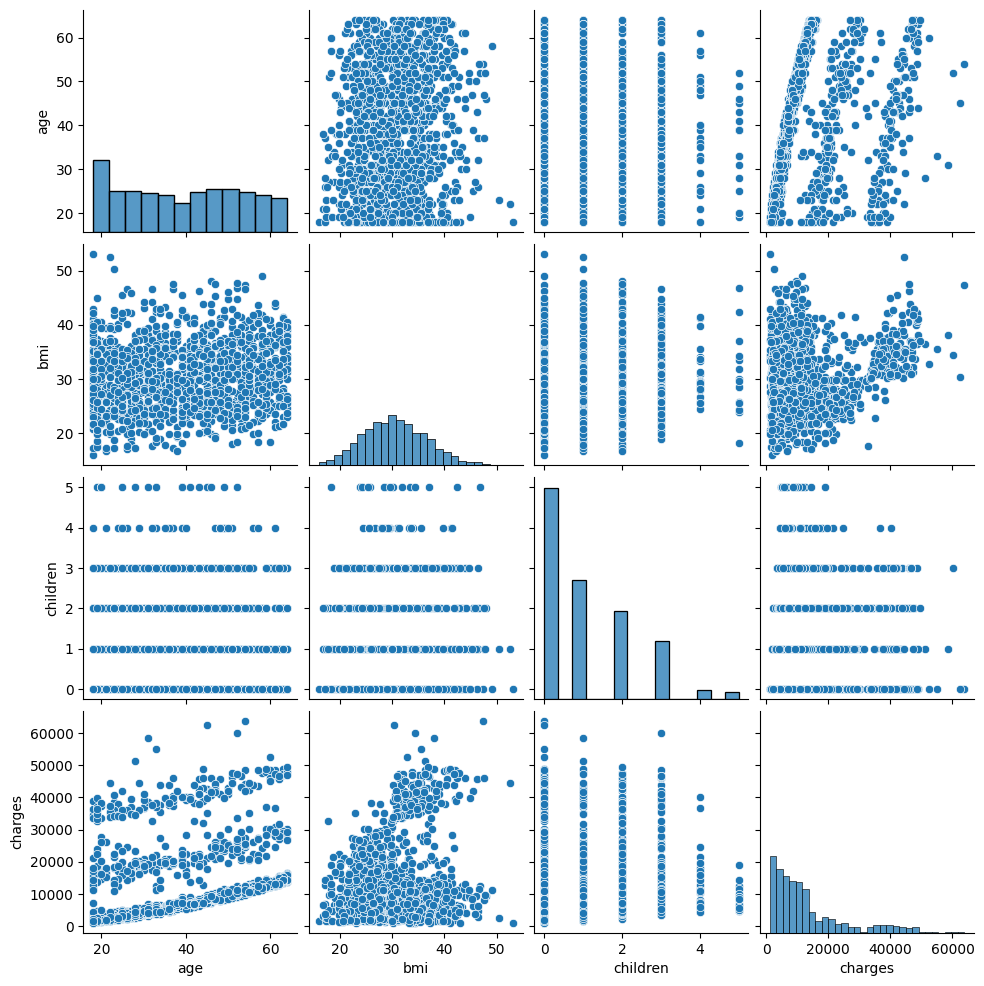

In [50]:
# 수치형 변수만 선택
numeric_data = data.select_dtypes(include=['float64', 'int64'])

sns.pairplot(numeric_data)
plt.show()


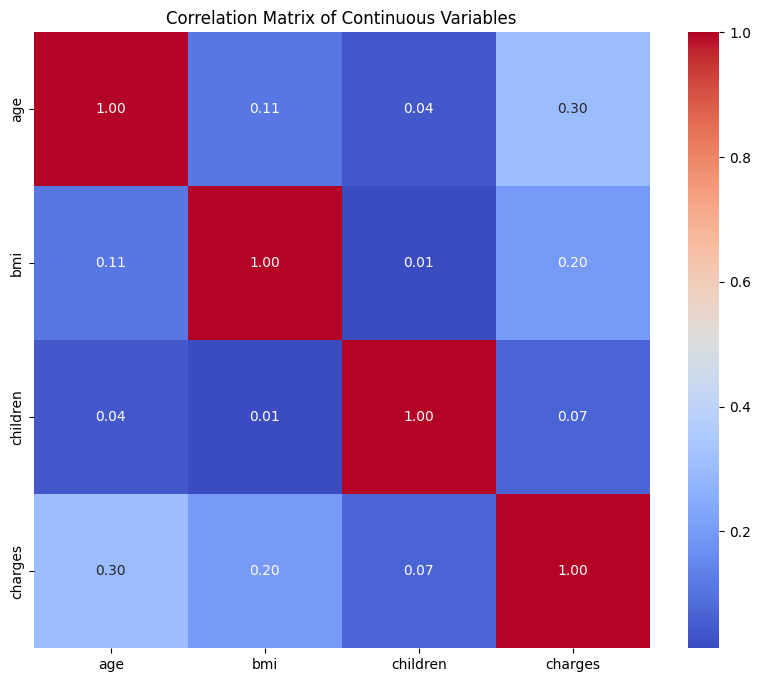

In [56]:
# 상관관계 행렬 계산 및 시각화
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

## 정규성 검정

- numeric_data: 연속형 컬럼만 필터링한 데이터프레임

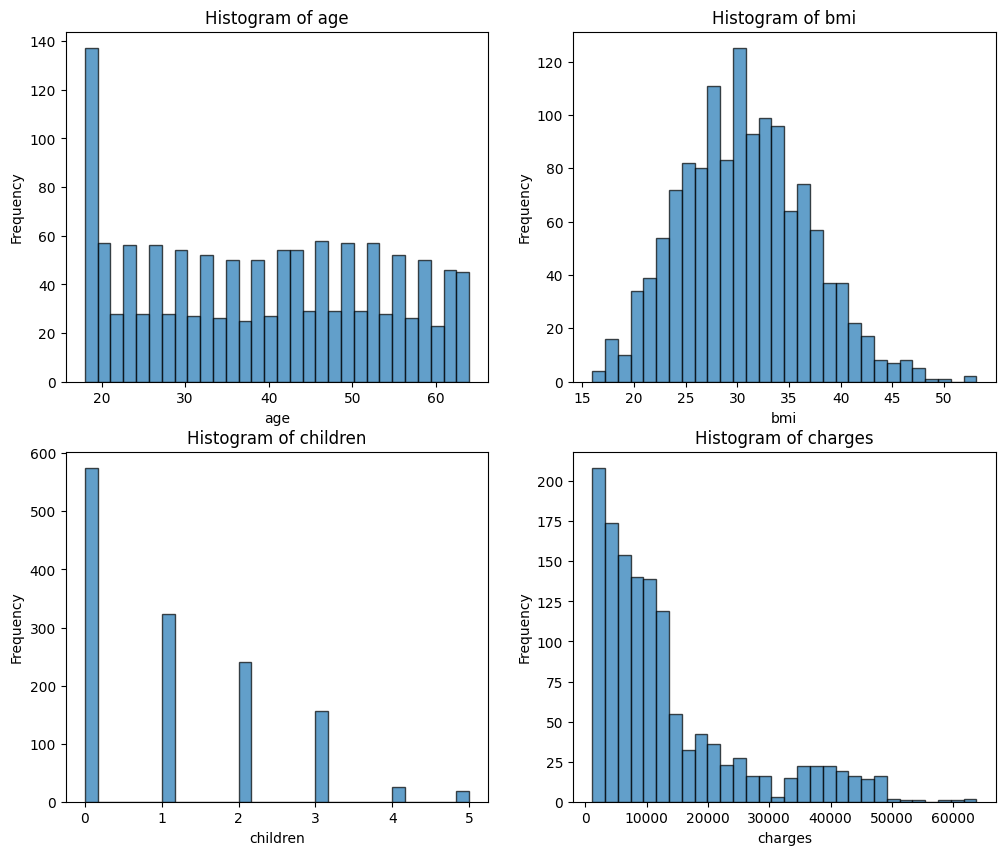

In [58]:
# 연속형 컬럼 시각화

gif, axes = plt.subplots(2, 2, figsize = (12, 10))

# 변수별 히스토그램 생성
for i, col in enumerate(numeric_data.columns):
    ax = axes[i // 2, i % 2]  # 서브플롯 위치 지정
    ax.hist(data[col], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

### Shapiro-Wilk Test

In [60]:
from scipy.stats import shapiro

# age
stat, p_value = shapiro(data['age'])
print(f"Shapiro-Wilk Test Statistic(age): {stat}, p-value: {p_value}")

# bmi
stat, p_value = shapiro(data['bmi'])
print(f"Shapiro-Wilk Test Statistic(bmi): {stat}, p-value: {p_value}")

# children
stat, p_value = shapiro(data['children'])
print(f"Shapiro-Wilk Test Statistic(children): {stat}, p-value: {p_value}")

# charges
stat, p_value = shapiro(data['charges'])
print(f"Shapiro-Wilk Test Statistic(charges): {stat}, p-value: {p_value}")

Shapiro-Wilk Test Statistic(age): 0.9447009637825445, p-value: 5.69204692845418e-22
Shapiro-Wilk Test Statistic(bmi): 0.9938864621676107, p-value: 2.60468368798344e-05
Shapiro-Wilk Test Statistic(children): 0.823180467362945, p-value: 5.066436570900864e-36
Shapiro-Wilk Test Statistic(charges): 0.8146881157362383, p-value: 1.1505226334932036e-36


- 4개의 컬럼 모두 p-value가 0.05보다 작다. 따라서 4개의 컬럼 모두 정규 분포를 따르지 않는다.

### Kolmogorov-Smirnov Test

In [61]:
from scipy.stats import kstest

# age
stat, p_value = kstest(data['age'], 'norm')
print(f"Kolmogorov-Smirnov Test Statistic(age): {stat}, p-value: {p_value}")

# bmi
stat, p_value = kstest(data['bmi'], 'norm')
print(f"Kolmogorov-Smirnov Test Statistic(bmi): {stat}, p-value: {p_value}")

# children
stat, p_value = kstest(data['children'], 'norm')
print(f"Kolmogorov-Smirnov Test Statistic(children): {stat}, p-value: {p_value}")

# charges
stat, p_value = kstest(data['charges'], 'norm')
print(f"Kolmogorov-Smirnov Test Statistic(charges): {stat}, p-value: {p_value}")

Kolmogorov-Smirnov Test Statistic(age): 1.0, p-value: 0.0
Kolmogorov-Smirnov Test Statistic(bmi): 1.0, p-value: 0.0
Kolmogorov-Smirnov Test Statistic(children): 0.5, p-value: 7.76823413134536e-310
Kolmogorov-Smirnov Test Statistic(charges): 1.0, p-value: 0.0


- 4개의 컬럼 모두 p-value가 0.05보다 작다. 따라서 4개의 컬럼 모두 정규 분포를 따르지 않는다.

**label이 정규분포를 따르지 않음 -> 비모수적 방법 활용(스피어만 상관계수)**

## 개별 X 변수와 y 변수 간의 관계 확인

## 더미변수화

In [51]:
columns_to_check = ['sex', 'smoker', 'region']
for column in columns_to_check:
    print(f"{column} unique values: {data[column].unique()}")

sex unique values: ['female' 'male']
smoker unique values: ['yes' 'no']
region unique values: ['southwest' 'southeast' 'northwest' 'northeast']


In [53]:
'''
sex, smoker, region -> categorical,
'''
# 원-핫 인코딩 적용

data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True, dtype=int)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [55]:
print(data.shape)
print(data.columns)

(1338, 9)
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')
